In [5]:
import pandas as pd
from datetime import datetime
import pandahouse as ph
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Подключаемся в базе данных
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [11]:
# Выполняем запрос и смотрим, сколько данных в таблице logistics_online
query_logistics_online = """
SELECT count(number_order)
FROM default.logistics_online
    
"""
count_of_numbers_query_logistics_online = ph.read_clickhouse(query_logistics_online, connection=connection_default)
count_of_numbers_query_logistics_online

,count(number_order)
0,6597


In [12]:
# Проверяем типы данных в столбцах в таблице logistics_online
query_DESCRIBE_logistics_online = """
DESCRIBE default.logistics_online
    
"""
DESCRIBE_logistics_online = ph.read_clickhouse(query_DESCRIBE_logistics_online, connection=connection_default)
DESCRIBE_logistics_online

# Видим что даты заданы в формате Nullable(String) необходимо перевести в формат даты для дальнейшей работы

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,date_order,Nullable(String),,,,,
1,number_order,Int64,,,,,
2,planned_data_order,Nullable(String),,,,,
3,timeslot_number,Int8,,,,,
4,result_data_order,Nullable(String),,,,,
5,delivery_type,String,,,,,
6,carrier_name,String,,,,,
7,seller_ID,Int64,,,,,
8,order_status,String,,,,,
9,customer_cluster,String,,,,,


In [13]:
# Выполняем запрос и смотрим, сколько данных в таблице returns_online
query_returns_online = """

SELECT count(product_ID) 
FROM default.returns_online
    
"""
count_of_numbers_query_returns_online = ph.read_clickhouse(query_returns_online, connection=connection_default)
count_of_numbers_query_returns_online

,count(product_ID)
0,496


In [14]:
# Проверяем типы данных в столбцах returns_online
query_DESCRIBE_returns_online = """
DESCRIBE default.returns_online
    
"""
DESCRIBE_returns_online = ph.read_clickhouse(query_DESCRIBE_returns_online, connection=connection_default)
DESCRIBE_returns_online

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,number_order,Int64,,,,,
1,product_ID,Int64,,,,,
2,amount_return,Int8,,,,,
3,return_date,Date,,,,,


In [15]:
# Выполняем запрос и смотрим, сколько данных в таблице product_online
query_product_online = """

SELECT count(product_ID) 
FROM default.product_online
    
"""
count_of_numbers_query_product_online = ph.read_clickhouse(query_product_online, connection=connection_default)
count_of_numbers_query_product_online

,count(product_ID)
0,12233


In [16]:
# Проверяем типы данных в столбцах product_online
query_DESCRIBE_product_online = """
DESCRIBE default.product_online
    
"""
DESCRIBE_product_online = ph.read_clickhouse(query_DESCRIBE_product_online, connection=connection_default)
DESCRIBE_product_online

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,number_order,Int64,,,,,
1,product_ID,Int64,,,,,
2,product_price,Float64,,,,,
3,amount,Int16,,,,,


In [17]:
# Меняем формат дат, удаляем все пропуски и не корректные даты, смотрим сколько ошибок в записи данных, 
# где дата итоговой доставки меньше даты заказа в таблице result_data_order

query_date_order_more_result_data_order = """
SELECT count(number_order)
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,   
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,    
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,      
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE date_order IS not NULL and   
         result_data_order IS not NULL and                                                
        planned_data_order IS not NULL) as df                                                                                                                                                                                             
WHERE 
        date_order > result_data_order
    
"""
date_order_more_result_data_order = ph.read_clickhouse(query_date_order_more_result_data_order, connection=connection_default)
date_order_more_result_data_order

,count(number_order)
0,916


In [18]:
# проводим такую же проверку по дате плановой доставке в таюлице result_data_order

query_date_order_more_planned_data_order = """
SELECT count(number_order)
FROM (
    SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,   
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,    
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,      
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE date_order IS not NULL and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL) as df 
WHERE 
        date_order > planned_data_order
    
"""
date_order_more_planned_data_order = ph.read_clickhouse(query_date_order_more_planned_data_order, connection=connection_default)
date_order_more_planned_data_order

,count(number_order)
0,0


**916 записей в базе записаны не корректно, считаю, что их необходимо не учитывать для проведения дальнейших расчетов, так как они могут искажать метрики**

**Задача №1:**

Посчитать OnTime - Метрика своевременности доставки. (Доставили в плановую дату доставки или нет), в %

 - Необходимо видеть изменение метрики по дням;

 - Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада, по таймслотам;

In [19]:
# Считаем есть ли повторяющиеся доставленные заказы с двумя датами плановой и итоговой датой доставки

query_twice_and_more = """
SELECT
    number_order,
    count(number_order) AS cnt
FROM(SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE order_status = 'Доставлен' and
          date_order IS not NULL and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          date_order <= result_data_order) as df
GROUP BY number_order
HAVING cnt > 1
    
"""
twice_and_more = ph.read_clickhouse(query_twice_and_more, connection=connection_default)
twice_and_more

,number_order,cnt
0,336693909,2
1,344629456,2
2,333776216,2


**Видим, что есть 3 заказа, которые имеют статус "Доставлено" и разные даты два раза, при не возможности получении информации о базе данных и способе их записи, предположу, что в статус "ДОСТАВЛЕНО" на 1 этапе записалась ошибка, поэтому для каждого из этих заказов я возьму максимальную дату плановой доставки и максимальную дату получения**

In [20]:
# Считаем метрику OnTime в общем по всем заказам, У нас в данных есть строки с пустыми date_order,
# я так понимаю, что это когда заказ по какой-то причине не был доставлен в первый раз, 
# поэтому я возьму максимальные даты доставки и плановые даты по каждому заказу.

query_OnTime = """
SELECT 
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
    
"""
OnTime_overall = ph.read_clickhouse(query_OnTime, connection=connection_default)
OnTime_overall

,count_of_orders,count_of_deliv_on_time,proc_on_time
0,4199,3837,91.0


Получается, что 91% заказов доставляется в плановую дату доставки

In [21]:
# Теперь посчитаем метрику OnTime по дням за дату отсчета я взяла дату планой доставки, так как важно проанализировать 
# в какой из почему в плановую доставку не удалось доставить

query_OnTime_by_day = """

SELECT
    planned_data_order,
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
GROUP BY planned_data_order
ORDER BY planned_data_order ASC

    
"""

# Redash обрабатывает запрос без ошибок, Юпитре ноутбук отказывается загружать данные с датам, поэтому 
# сохранила результирующую таблицу в csv

OnTime__by_day = pd.read_csv('OnTime_by_day.csv')
OnTime__by_day

,planned_data_order,count_of_orders,count_of_deliv_on_time,proc_on_time
0,01/01/21,1,0,0
1,02/01/21,1,0,0
2,05/01/21,5,3,60
3,06/01/21,1,1,100
4,07/01/21,3,3,100
...,...,...,...,...
75,21/03/21,7,7,100
76,22/03/21,9,9,100
77,23/03/21,2,2,100
78,24/03/21,1,1,100


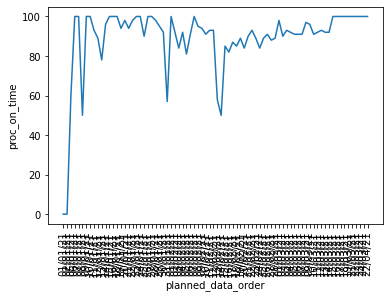

In [22]:
ax = sns.lineplot(data=OnTime__by_day, x="planned_data_order", y="proc_on_time")
ax.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(15,7)})

In [23]:
# теперь посмотрим на разрезы по перевозчикам, по типу доставки, по кластерам склада, по таймслотам все вместе,
# а затем по отдельности

query_OnTime_many = """

SELECT
    carrier_name,
    delivery_type,
    warehouse_cluster,
    timeslot_number,
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
    carrier_name,
    delivery_type,
    warehouse_cluster,
    timeslot_number
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
GROUP BY
        carrier_name,
        delivery_type,
        warehouse_cluster,
        timeslot_number
ORDER BY proc_on_time DESC
    
"""
OnTime_many = ph.read_clickhouse(query_OnTime_many, connection=connection_default)
OnTime_many

,carrier_name,delivery_type,warehouse_cluster,timeslot_number,count_of_orders,count_of_deliv_on_time,proc_on_time
0,3PL 2,Самовывоз,Кластер Московская область,1,68,68,100.0
1,3PL 1,Курьер,Кластер Казань,3,1,1,100.0
2,3PL 3,Самовывоз,Кластер Северо-Запад,2,2,2,100.0
3,3PL 1,Самовывоз,Кластер Москва,3,14,14,100.0
4,3PL 1,Самовывоз,Кластер Москва,5,1,1,100.0
...,...,...,...,...,...,...,...
135,3PL 2,Курьер,Кластер Санкт-Петербург,2,3,1,33.0
136,3PL 2,Самовывоз,Кластер Новосибирск,3,1,0,0.0
137,3PL 3,Курьер,Кластер Краснодар,2,2,0,0.0
138,3PL 3,Самовывоз,Кластер Хабаровск,1,1,0,0.0


In [24]:
# разрезы по перевозчикам

query_OnTime_carrier_name = """
SELECT
    carrier_name,
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
    carrier_name,
    delivery_type,
    warehouse_cluster,
    timeslot_number
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
GROUP BY
        carrier_name
ORDER BY proc_on_time DESC
    
"""
OnTime_carrier_name = ph.read_clickhouse(query_OnTime_carrier_name, connection=connection_default)
OnTime_carrier_name

,carrier_name,count_of_orders,count_of_deliv_on_time,proc_on_time
0,3PL 1,1331,1279,96.0
1,3PL 2,1235,1147,93.0
2,3PL 4,157,145,92.0
3,Самодоставка,1180,1019,86.0
4,3PL 3,296,247,83.0


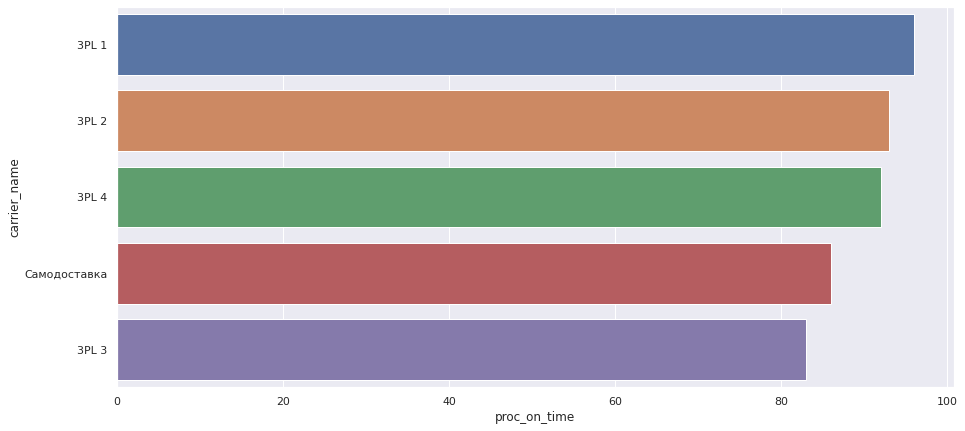

In [17]:
ax = sns.barplot(x="proc_on_time", y="carrier_name", data=OnTime_carrier_name)

Самый низкий процент доставки вовремя у доставщика 3PL 3

In [25]:
# по типу доставки

query_OnTime_delivery_type = """

SELECT
    delivery_type,
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
    carrier_name,
    delivery_type,
    warehouse_cluster,
    timeslot_number
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
GROUP BY
        delivery_type
ORDER BY proc_on_time DESC
    
"""
OnTime_delivery_type = ph.read_clickhouse(query_OnTime_delivery_type, connection=connection_default)
OnTime_delivery_type

,delivery_type,count_of_orders,count_of_deliv_on_time,proc_on_time
0,Самовывоз,2080,1996,96.0
1,Курьер,2119,1841,87.0


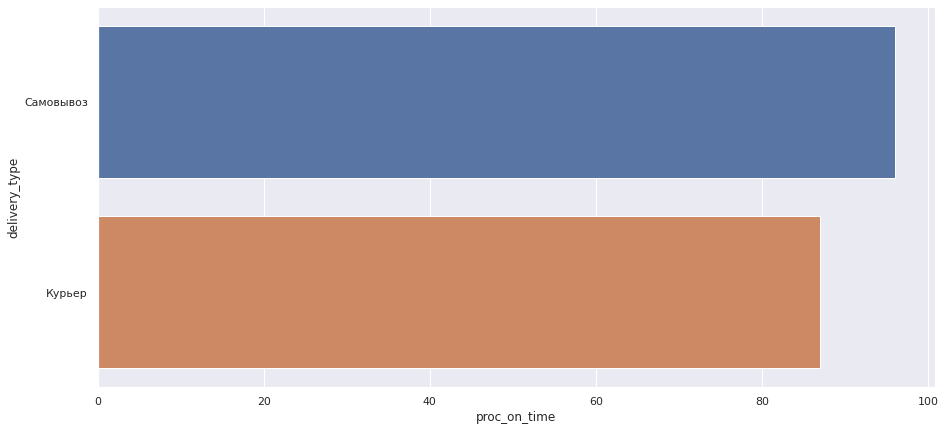

In [19]:
ax = sns.barplot(x="proc_on_time", y="delivery_type", data=OnTime_delivery_type)

Когда доставка осуществляется самовывозом, процент доставки заказа вовремя занчительно выше

In [26]:
# по кластерам склада

query_OnTime_warehouse_cluster = """

SELECT
    warehouse_cluster,
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
    carrier_name,
    delivery_type,
    warehouse_cluster,
    timeslot_number
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
GROUP BY
        warehouse_cluster
ORDER BY proc_on_time DESC
    
"""
OnTime_warehouse_cluster = ph.read_clickhouse(query_OnTime_warehouse_cluster, connection=connection_default)
OnTime_warehouse_cluster

,warehouse_cluster,count_of_orders,count_of_deliv_on_time,proc_on_time
0,Кластер Екатеринбург,468,457,98.0
1,Кластер Новосибирск,251,245,98.0
2,Кластер Санкт-Петербург,335,323,96.0
3,Кластер Центр,170,164,96.0
4,Кластер Казань,444,418,94.0
5,Кластер Краснодар,391,360,92.0
6,Кластер Москва,1245,1091,88.0
7,Кластер Калининград,88,77,88.0
8,Кластер Московская область,673,589,88.0
9,Кластер Хабаровск,7,6,86.0


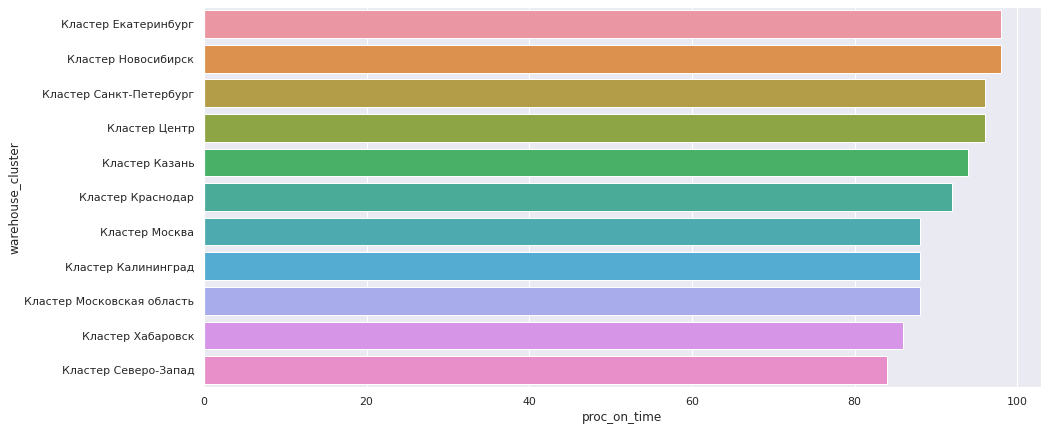

In [21]:
ax = sns.barplot(x="proc_on_time", y="warehouse_cluster", data=OnTime_warehouse_cluster)

В Екатеринбурге и Новосибирске больше всего заказов доставлется вовремя

In [27]:
# по таймслотам 

# тут мне необходимо было взять даты заказов и их максимальные даты получения и плановые даты, так как если заказа
# не доставлен информация по планоой дате обновляется.

query_OnTime_timeslot_number = """

SELECT
    timeslot_number,
    count(DISTINCT number_order) as count_of_orders,
    count(CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) as count_of_deliv_on_time,
    round(count(DISTINCT CASE WHEN (planned_data_order - result_data_order) >= 0 THEN number_order END) / 
          count(DISTINCT number_order) * 100) as proc_on_time
FROM
    (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        number_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
    carrier_name,
    delivery_type,
    warehouse_cluster,
    timeslot_number
    FROM default.logistics_online
    WHERE
          order_status = 'Доставлен' and
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as A
INNER JOIN
    (SELECT 
        number_order,
        max(planned_data_order) as planned_data_order,
        max(result_data_order) as result_data_order
    FROM(SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
    FROM default.logistics_online
    WHERE
        order_status = 'Доставлен' and   
          result_data_order IS not NULL and                                                
          planned_data_order IS not NULL and
          (date_order <= result_data_order or date_order IS NULL)) as h
    GROUP BY number_order) as B
ON 
    A.number_order = B.number_order and
    A.planned_data_order = B.planned_data_order and
    A.result_data_order = B.result_data_order
GROUP BY
        timeslot_number
ORDER BY timeslot_number ASC
    
"""
OnTime_timeslot_number = ph.read_clickhouse(query_OnTime_timeslot_number, connection=connection_default)
OnTime_timeslot_number

,timeslot_number,count_of_orders,count_of_deliv_on_time,proc_on_time
0,1,3730,3410,91.0
1,2,405,370,91.0
2,3,49,43,88.0
3,4,14,13,93.0
4,5,1,1,100.0


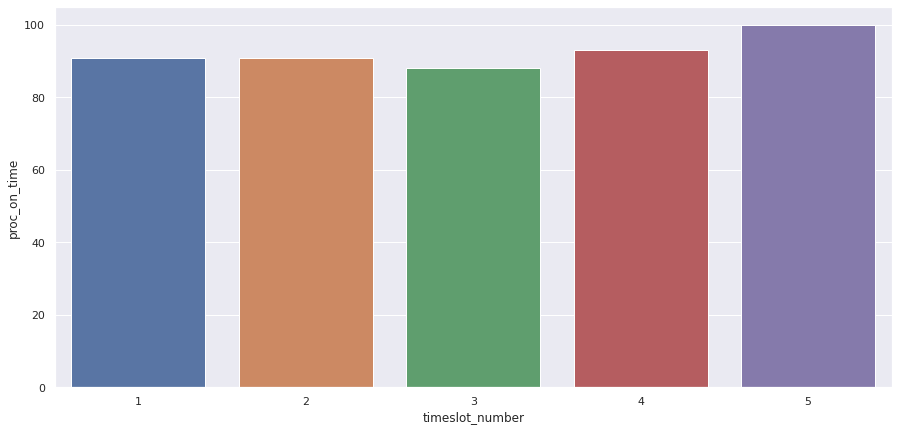

In [28]:
ax = sns.barplot(x="timeslot_number", y="proc_on_time", data=OnTime_timeslot_number)

**Дашборд к первому заданию**

http://redash.lab.karpov.courses/public/dashboards/LpAYTE25wg9lFmfMY3pezQ9bGQVsuPdhrihBYTqE?org_slug=default

**ВЫВОД по Заданию №1**

По Результатам анализа видим, что товары в 91% случаев доставляются во время.  
При детальном изучении данных, понимаем, что этот процент можно увеличить, явная причина это доставка от 3PL 3, всего 61% заказов доставляются вовремя. Необходимо понять причину и принять  меры для уличения  данного показателя. 


**Задача №2:**

Посчитать PromisedClick2Delivery - метрика обещанного срока доставки (от даты заказа до первой плановой даты доставки), в сутках.

 - Необходима динамика по дням, неделям, месяцам;

 - Необходимо сравнение перевозчиков;

 - Необходимо понимание уровня метрики из кластера в кластер.

In [29]:
# посмотрим общий показатель PromisedClick2Delivery,
# сортируем данные: так как нужно узнать разницу от даты заказа, исключим все данные, которые не имеют дату заказа, 
# далее нам нужны только первые плановые даты, значит фильтруем по  timeslot_number = 1, 
# так как эта первая попытка доставить заказ

query_PromisedClick2Delivery = """

SELECT
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PromisedClick2Delivery
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
    
"""
PromisedClick2Delivery = ph.read_clickhouse(query_PromisedClick2Delivery, connection=connection_default)
PromisedClick2Delivery

,PromisedClick2Delivery
0,8.0


In [25]:
# сортируем данные: так как нужно узнать разницу от даты заказа, исключим все данные, которые не имеют дату заказа, 
# далее нам нужны только первые плановые даты, значит фильтруем по  timeslot_number = 1, 
# так как эта первая попытка доставить заказ

query_PromisedClick2Delivery_overall = """

SELECT
    toStartOfMonth(date_order) as Month,
    toStartOfWeek(date_order) as Week,
    date_order,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PromisedClick2Delivery
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        date_order,
        Month,
        Week
ORDER BY Month ASC
    
"""
PromisedClick2Delivery_overall = pd.read_csv('PromisedClick2Delivery_overall.csv')
PromisedClick2Delivery_overall

,Month,Week,date_order,PromisedClick2Delivery
0,01/01/21,27/12/20,01/01/21,9
1,01/01/21,27/12/20,02/01/21,9
2,01/01/21,03/01/21,03/01/21,9
3,01/01/21,03/01/21,04/01/21,9
4,01/01/21,03/01/21,05/01/21,9
...,...,...,...,...
69,01/03/21,07/03/21,11/03/21,7
70,01/03/21,07/03/21,12/03/21,6
71,01/03/21,07/03/21,13/03/21,5
72,01/03/21,14/03/21,14/03/21,5


In [30]:
# динамика по дням

query_PromisedClick2Delivery_overall_day = """

SELECT
    date_order,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PromisedClick2Delivery
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        date_order
ORDER BY date_order ASC
    
"""
PromisedClick2Delivery_overall_day = pd.read_csv('PromisedClick2Delivery_overall_day.csv')
PromisedClick2Delivery_overall_day

,date_order,PromisedClick2Delivery
0,01/01/21,9
1,02/01/21,9
2,03/01/21,9
3,04/01/21,9
4,05/01/21,9
...,...,...
69,11/03/21,7
70,12/03/21,6
71,13/03/21,5
72,14/03/21,5


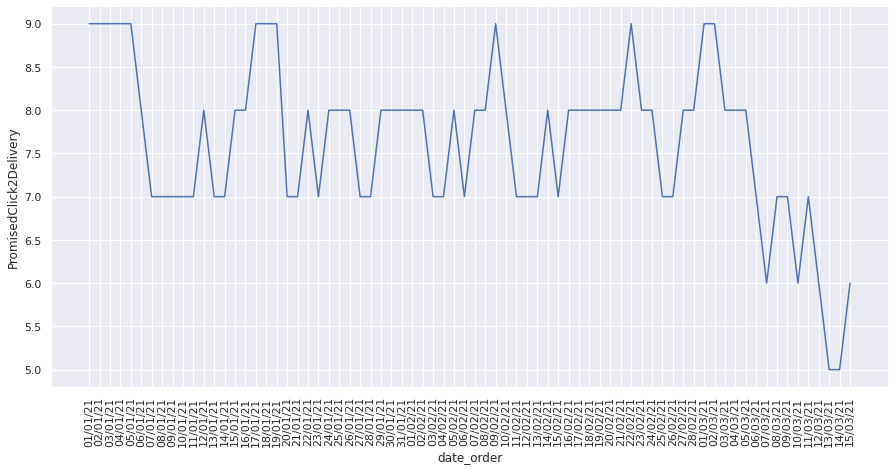

In [31]:
ax = sns.lineplot(data=PromisedClick2Delivery_overall_day, x="date_order", y="PromisedClick2Delivery")
ax.tick_params(axis='x', rotation=90)

In [32]:
# динамика по неделям

query_PromisedClick2Delivery_week = """

SELECT
    toStartOfWeek(date_order) as Week,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PromisedClick2Delivery
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        Week
ORDER BY Week ASC
    
"""
PromisedClick2Delivery_week = pd.read_csv('PromisedClick2Delivery_week.csv')
PromisedClick2Delivery_week

,Week,PromisedClick2Delivery
0,27/12/20,9
1,03/01/21,8
2,10/01/21,8
3,17/01/21,8
4,24/01/21,8
5,31/01/21,8
6,07/02/21,8
7,14/02/21,8
8,21/02/21,8
9,28/02/21,8


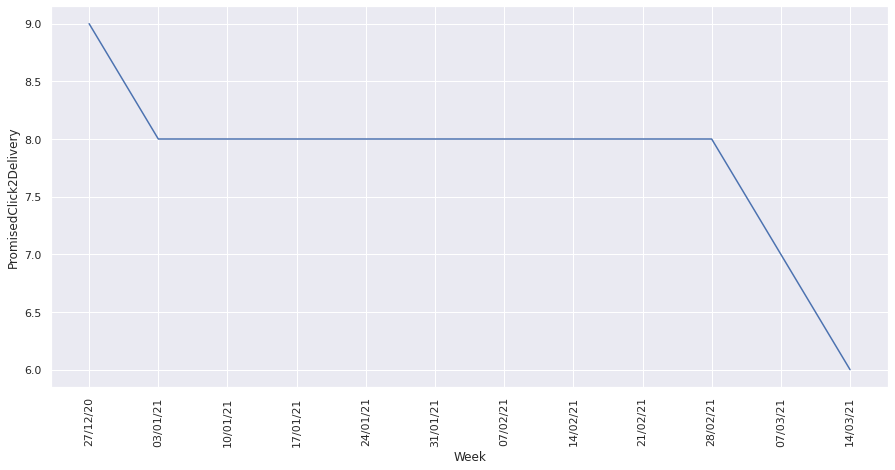

In [33]:
ax = sns.lineplot(data=PromisedClick2Delivery_week, x="Week", y="PromisedClick2Delivery")
ax.tick_params(axis='x', rotation=90)

In [34]:
# динамика по месяцам

query_PromisedClick2Delivery_Month = """

SELECT
    toStartOfMonth(date_order) as Month,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PromisedClick2Delivery
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        Month
ORDER BY Month ASC
    
"""
PromisedClick2Delivery_Month = pd.read_csv('PromisedClick2Delivery_Month.csv')
PromisedClick2Delivery_Month

,Month,PromisedClick2Delivery
0,01/01/21,8
1,01/02/21,8
2,01/03/21,7


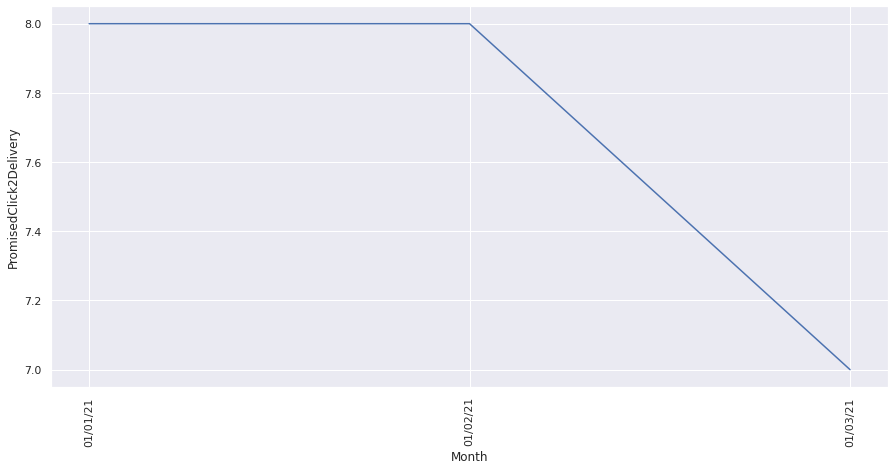

In [35]:
ax = sns.lineplot(data=PromisedClick2Delivery_Month, x="Month", y="PromisedClick2Delivery")
ax.tick_params(axis='x', rotation=90)

Видно что обещанный срок доставки плавно идет на скоращение, это не может не радовать, 
но надо еще посмотреть на фактические даты доставки

In [36]:
# Посмотритм распределение по доставщикам

query_DATEDIFF_carrier_name = """

SELECT
    carrier_name,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PromisedClick2Delivery
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        carrier_name
ORDER BY PromisedClick2Delivery ASC
    
"""
DATEDIFF_carrier_name = ph.read_clickhouse(query_DATEDIFF_carrier_name, connection=connection_default)
DATEDIFF_carrier_name

,carrier_name,PromisedClick2Delivery
0,3PL 2,8.0
1,3PL 1,8.0
2,3PL 4,8.0
3,3PL 3,8.0
4,Самодоставка,8.0


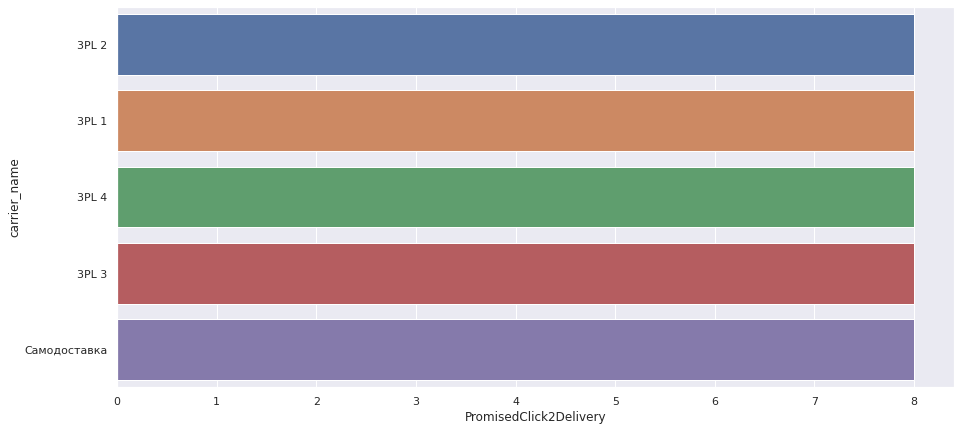

In [37]:
ax = sns.barplot(x="PromisedClick2Delivery", y="carrier_name", data=DATEDIFF_carrier_name)

In [38]:
# По кластерам склада 
query_DATEDIFF_warehouse_cluster = """

SELECT
    warehouse_cluster as cluster,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PCD_warehouse
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        warehouse_cluster
ORDER BY PCD_warehouse ASC
    
"""
DATEDIFF_warehouse_cluster = ph.read_clickhouse(query_DATEDIFF_warehouse_cluster, connection=connection_default)
DATEDIFF_warehouse_cluster

,cluster,PCD_warehouse
0,Кластер Хабаровск,7.0
1,Кластер Краснодар,8.0
2,Кластер Санкт-Петербург,8.0
3,Кластер Екатеринбург,8.0
4,Кластер Казань,8.0
5,Кластер Центр,8.0
6,Кластер Москва,8.0
7,Кластер Калининград,8.0
8,Кластер Московская область,8.0
9,Кластер Новосибирск,8.0


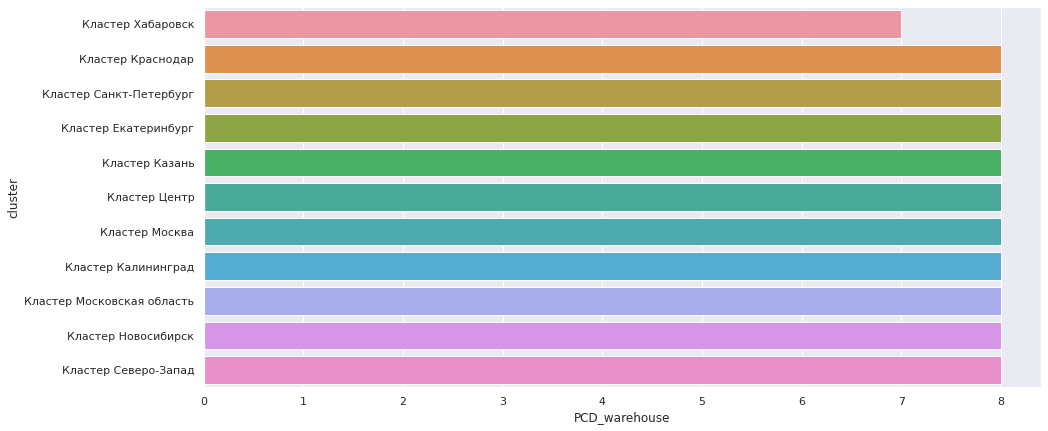

In [39]:
ax = sns.barplot(x="PCD_warehouse", y="cluster", data=DATEDIFF_warehouse_cluster)

In [40]:
# По кластерам покупателей 
query_DATEDIFF_customer_cluster = """

SELECT
    customer_cluster as cluster,
    round(AVG(DATEDIFF(day, date_order, planned_data_order))) as PCD_customer
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        carrier_name,
        customer_cluster,
        delivery_type,
        number_order,
        order_status,
        toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        seller_ID,
        timeslot_number,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        result_data_order IS not NULL and                                                
        planned_data_order IS not NULL and
        date_order IS NOT NULL and
        date_order <= result_data_order and
        timeslot_number = 1) as df
GROUP BY 
        customer_cluster
ORDER BY PCD_customer ASC
    
"""
DATEDIFF_customer_cluster = ph.read_clickhouse(query_DATEDIFF_customer_cluster, connection=connection_default)
DATEDIFF_customer_cluster

,cluster,PCD_customer
0,Кластер Якутия,7.0
1,Кластер Краснодар,8.0
2,Кластер Хабаровск,8.0
3,Кластер Санкт-Петербург,8.0
4,Кластер Екатеринбург,8.0
5,Кластер Казань,8.0
6,Кластер Центр,8.0
7,Кластер Москва,8.0
8,Кластер Калининград,8.0
9,Кластер Московская область,8.0


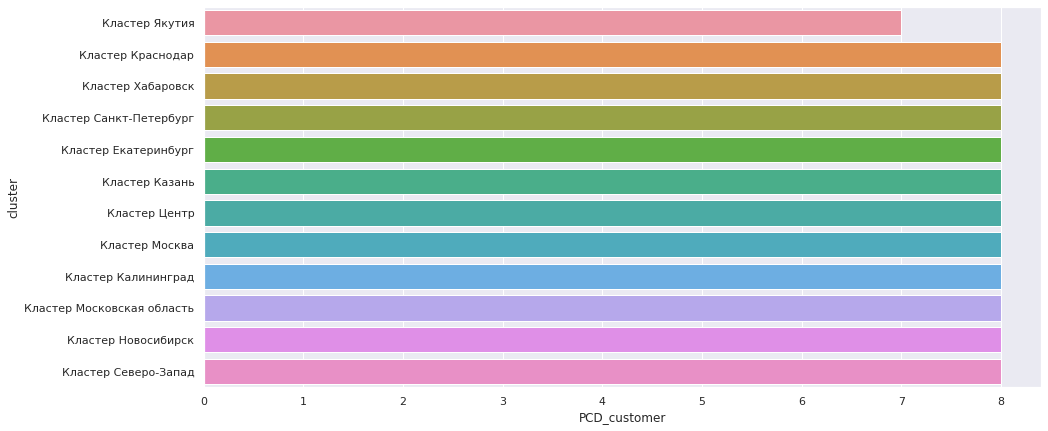

In [41]:
ax = sns.barplot(x="PCD_customer", y="cluster", data=DATEDIFF_customer_cluster)

In [42]:
cluster = DATEDIFF_warehouse_cluster.merge(DATEDIFF_customer_cluster,  how = 'inner', on = 'cluster')
cluster

,cluster,PCD_warehouse,PCD_customer
0,Кластер Хабаровск,7.0,8.0
1,Кластер Краснодар,8.0,8.0
2,Кластер Санкт-Петербург,8.0,8.0
3,Кластер Екатеринбург,8.0,8.0
4,Кластер Казань,8.0,8.0
5,Кластер Центр,8.0,8.0
6,Кластер Москва,8.0,8.0
7,Кластер Калининград,8.0,8.0
8,Кластер Московская область,8.0,8.0
9,Кластер Новосибирск,8.0,8.0


Средняя дата обещанной доставки везде примерно одинакова, только склад в Хабаровске выделяется

**Дашборд к Заданию 2**

http://redash.lab.karpov.courses/public/dashboards/GiTZh4NA4ZIlJw5Ehul0Q0AvyCvgdP7sBozJIayM?org_slug=default

**ВЫВОДЫ по Заданию №2**

По Результатам анализа видим, что среднее обещанное время доставки 8 дней.  
При детальном изучении данных, понимаем, что этот показатель потихоньку снижается.


**Задача №3:**

Посчитать Click2Delivery - метрика фактического срока доставки (от даты заказа до момента вручения), в сутках.

 - Необходимо сравнение с метрикой PromisedClick2Delivery;

 - Необходимо понимание кластеров, где заказы доставляются быстрее, чем мы обещаем клиентам;

In [43]:
# Для того, что бы посчитать Click2Delivery мне кажется, необходимо только последую дату доставки по заказу
# так как причины не доставленного товара не ясны в первый раз, и не всегда эта может быть вина доставки.

query_Click2Delivery = """

SELECT
    round(AVG(DATEDIFF(day, B.date_order, A.result_data_order))) as Click2Delivery
FROM (SELECT
            number_order,
            max(result_data_order) as result_data_order,
            max(planned_data_order) as planned_data_order
     FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            result_data_order IS not NULL and                                                
            planned_data_order IS not NULL and
            (date_order <= result_data_order or date_order IS NULL)) as df
     GROUP BY 
            number_order) as A
INNER JOIN
    (SELECT 
        number_order,
        date_order
    FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            carrier_name,
            customer_cluster,
            delivery_type,
            number_order,
            order_status,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            seller_ID,
            timeslot_number,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            result_data_order IS not NULL and                                                
            planned_data_order IS not NULL and
            (date_order <= result_data_order or date_order IS NULL)) as s) as B
ON 
    A.number_order = B.number_order
"""
Click2Delivery = ph.read_clickhouse(query_Click2Delivery, connection=connection_default)
Click2Delivery

,Click2Delivery
0,6.0


Среднее количество дней реальной доставки 6 дней

In [44]:
# Посмотрим по дням распередение Click2Delivery_by_day

query_Click2Delivery_by_day = """

SELECT
    date_order,
    round(AVG(DATEDIFF(day, B.date_order, A.result_data_order))) as Click2Delivery
FROM (SELECT
            number_order,
            max(result_data_order) as result_data_order,
            max(planned_data_order) as planned_data_order
     FROM (SELECT
            toDateOrNull(date_order) as date_order,
            number_order,
            toDateOrNull(planned_data_order) as planned_data_order,
            toDateOrNull(result_data_order) as result_data_order
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            planned_data_order != '1970-01-01' and
            result_data_order != '1970-01-01' and
            (date_order != '1970-01-01' or  date_order IS NULL) and
            (date_order <= result_data_order or date_order IS NULL)) as df
     GROUP BY 
            number_order) as A
INNER JOIN
    (SELECT 
        number_order,
        date_order
    FROM (SELECT
            toDateOrNull(date_order) as date_order,
            carrier_name,
            customer_cluster,
            delivery_type,
            number_order,
            order_status,
            toDateOrNull(planned_data_order) as planned_data_order,
            toDateOrNull(result_data_order) as result_data_order,
            seller_ID,
            timeslot_number,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            planned_data_order != '1970-01-01' and
            result_data_order != '1970-01-01' and
            date_order IS NOT NULL and
            date_order != '1970-01-01' and
            date_order <= result_data_order) as s) as B
ON 
    A.number_order = B.number_order
GROUP BY date_order
ORDER BY date_order ASC
"""
Click2Delivery_by_day = pd.read_csv('Click2Delivery_by_day.csv')
Click2Delivery_by_day

,date_order,Click2Delivery
0,01/01/21,8.0
1,02/01/21,8.0
2,03/01/21,7.0
3,04/01/21,6.0
4,05/01/21,8.0
...,...,...
70,12/03/21,1.0
71,13/03/21,1.0
72,14/03/21,1.0
73,15/03/21,0.0


In [45]:
# Теперь соеденим две таблицы и посморим разницу между метриками
df = PromisedClick2Delivery_overall_day.merge(Click2Delivery_by_day, how = 'inner', on = 'date_order')
df['diff'] = df.PromisedClick2Delivery - df.Click2Delivery
df

,date_order,PromisedClick2Delivery,Click2Delivery,diff
0,01/01/21,9,8.0,1.0
1,02/01/21,9,8.0,1.0
2,03/01/21,9,7.0,2.0
3,04/01/21,9,6.0,3.0
4,05/01/21,9,8.0,1.0
...,...,...,...,...
69,11/03/21,7,2.0,5.0
70,12/03/21,6,1.0,5.0
71,13/03/21,5,1.0,4.0
72,14/03/21,5,1.0,4.0


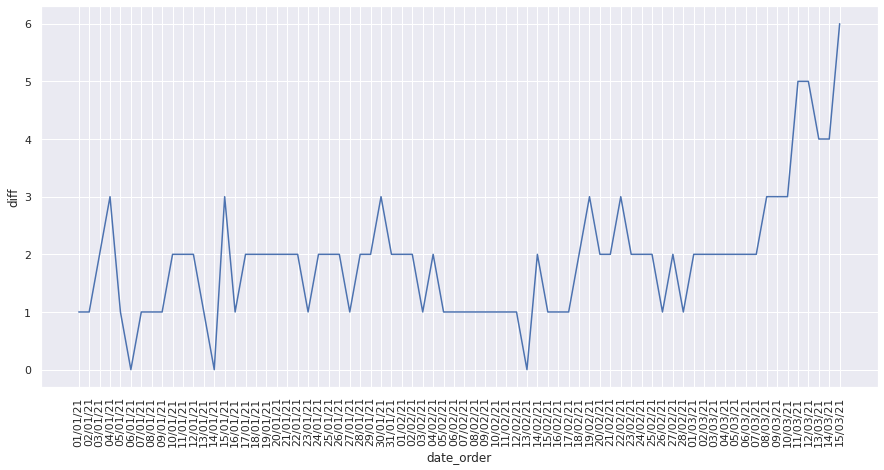

In [46]:
ax = sns.lineplot(data=df, x="date_order", y="diff")
ax.tick_params(axis='x', rotation=90)

В целом товары доставляются быстрее обещенной даты

In [47]:
# Посмотрим по кластерам покпателей распередение Click2Delivery_by_day

query_Click2Delivery_customer_cluster = """

SELECT
    B.customer_cluster as cluster,
    round(AVG(DATEDIFF(day, B.date_order, A.result_data_order))) as Click2Delivery
FROM (SELECT
            number_order,
            max(result_data_order) as result_data_order,
            max(planned_data_order) as planned_data_order
     FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            result_data_order IS not NULL and                                                
            planned_data_order IS not NULL and
            (date_order <= result_data_order or date_order IS NULL)) as df
     GROUP BY 
            number_order) as A
INNER JOIN
    (SELECT 
        number_order,
        date_order,
        customer_cluster,
        warehouse_cluster
    FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            carrier_name,
            customer_cluster,
            delivery_type,
            number_order,
            order_status,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            seller_ID,
            timeslot_number,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            result_data_order IS not NULL and                                                
            planned_data_order IS not NULL and
            (date_order <= result_data_order or date_order IS NULL)) as s) as B
ON 
    A.number_order = B.number_order
GROUP BY customer_cluster
ORDER BY Click2Delivery DESC
"""
Click2Delivery_customer_cluster = ph.read_clickhouse(query_Click2Delivery_customer_cluster, connection=connection_default)
Click2Delivery_customer_cluster

,cluster,Click2Delivery
0,Кластер Хабаровск,9.0
1,Кластер Якутия,8.0
2,Кластер Калининград,8.0
3,Кластер Москва,7.0
4,Кластер Краснодар,6.0
5,Кластер Центр,6.0
6,Кластер Московская область,6.0
7,Кластер Новосибирск,6.0
8,Кластер Северо-Запад,6.0
9,Кластер Санкт-Петербург,5.0


In [48]:
# теперь соеденим две таблицы, что бы посмотреть разницу в метриках 

df_customer_cluster = DATEDIFF_customer_cluster.merge(Click2Delivery_customer_cluster, how = 'inner', on = 'cluster')
df_customer_cluster['diff'] = df_customer_cluster.PCD_customer - df_customer_cluster.Click2Delivery
df_customer_cluster.sort_values('diff', ascending = False)

,cluster,PCD_customer,Click2Delivery,diff
4,Кластер Екатеринбург,8.0,4.0,4.0
3,Кластер Санкт-Петербург,8.0,5.0,3.0
5,Кластер Казань,8.0,5.0,3.0
1,Кластер Краснодар,8.0,6.0,2.0
6,Кластер Центр,8.0,6.0,2.0
9,Кластер Московская область,8.0,6.0,2.0
10,Кластер Новосибирск,8.0,6.0,2.0
11,Кластер Северо-Запад,8.0,6.0,2.0
7,Кластер Москва,8.0,7.0,1.0
8,Кластер Калининград,8.0,8.0,0.0


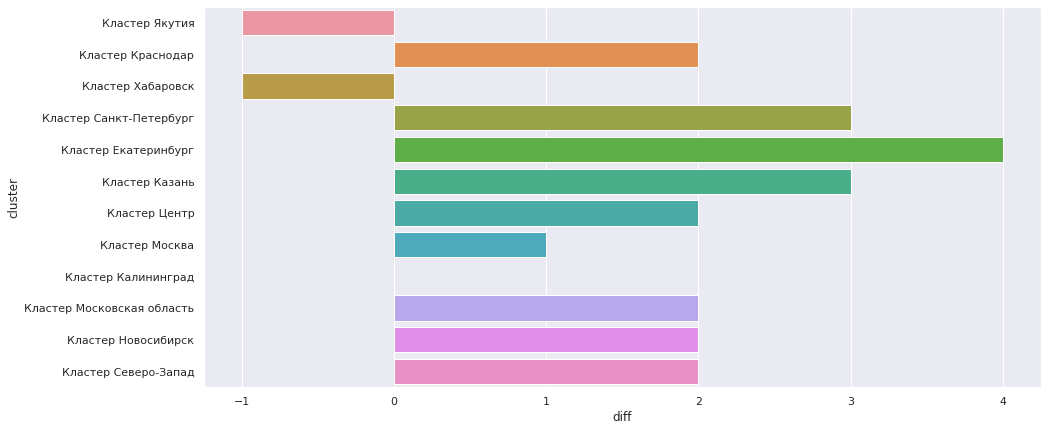

In [49]:
ax = sns.barplot(x="diff", y="cluster", data=df_customer_cluster)

**В кластере покупателей в среднем в Екатеринбурге быстрее доставляют на 4 дня, а в Хабаровске и Якутии опоздание**

In [50]:
# Посмотрим по кластерам продавцов распередение Click2Delivery_by_day

query_Click2Delivery_warehouse_cluster = """

SELECT
    B.warehouse_cluster as cluster,
    round(AVG(DATEDIFF(day, B.date_order, A.result_data_order))) as Click2Delivery
FROM (SELECT
            number_order,
            max(result_data_order) as result_data_order,
            max(planned_data_order) as planned_data_order
     FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            number_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            result_data_order IS not NULL and                                                
            planned_data_order IS not NULL and
            (date_order <= result_data_order or date_order IS NULL)) as df
     GROUP BY 
            number_order) as A
INNER JOIN
    (SELECT 
        number_order,
        date_order,
        customer_cluster,
        warehouse_cluster
    FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            carrier_name,
            customer_cluster,
            delivery_type,
            number_order,
            order_status,
            toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            seller_ID,
            timeslot_number,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            order_status = 'Доставлен' and
            result_data_order IS not NULL and                                                
            planned_data_order IS not NULL and
            (date_order <= result_data_order or date_order IS NULL)) as s) as B
ON 
    A.number_order = B.number_order
GROUP BY cluster
ORDER BY Click2Delivery DESC

"""
Click2Delivery_warehouse_cluster = ph.read_clickhouse(query_Click2Delivery_warehouse_cluster, connection=connection_default)
Click2Delivery_warehouse_cluster

,cluster,Click2Delivery
0,Кластер Хабаровск,8.0
1,Кластер Москва,7.0
2,Кластер Калининград,7.0
3,Кластер Московская область,7.0
4,Кластер Краснодар,6.0
5,Кластер Санкт-Петербург,6.0
6,Кластер Северо-Запад,6.0
7,Кластер Казань,5.0
8,Кластер Центр,5.0
9,Кластер Новосибирск,5.0


In [51]:
# теперь соеденим две таблицы, что бы посмотреть разницу в метриках 

df_warehouse_cluster = DATEDIFF_warehouse_cluster.merge(Click2Delivery_warehouse_cluster, how = 'inner', on = 'cluster')
df_warehouse_cluster['diff'] = df_warehouse_cluster.PCD_warehouse - df_warehouse_cluster.Click2Delivery
df_warehouse_cluster.sort_values('diff', ascending = False)

,cluster,PCD_warehouse,Click2Delivery,diff
3,Кластер Екатеринбург,8.0,3.0,5.0
4,Кластер Казань,8.0,5.0,3.0
5,Кластер Центр,8.0,5.0,3.0
9,Кластер Новосибирск,8.0,5.0,3.0
1,Кластер Краснодар,8.0,6.0,2.0
2,Кластер Санкт-Петербург,8.0,6.0,2.0
10,Кластер Северо-Запад,8.0,6.0,2.0
6,Кластер Москва,8.0,7.0,1.0
7,Кластер Калининград,8.0,7.0,1.0
8,Кластер Московская область,8.0,7.0,1.0


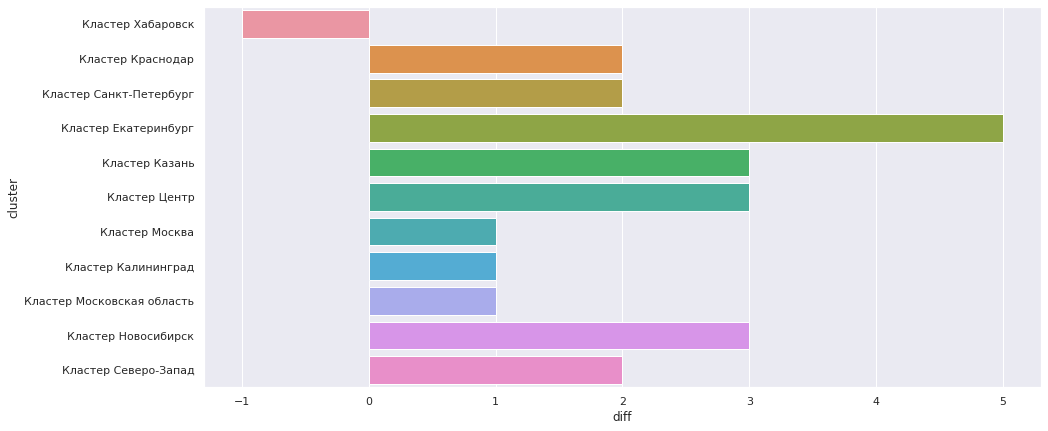

In [52]:
ax = sns.barplot(x="diff", y="cluster", data=df_warehouse_cluster)

**Дашборд для Задание 3**

http://redash.lab.karpov.courses/public/dashboards/9SvQx6qkN6W0yCOSMDV1aQ80oiDLcCNPlbwTK9Oi?org_slug=default

**Выводы по Заданию 3**

По Результатам анализа видим, что среднее реальное время доставки 6 дней, что на 2 дня меньше чем обещанная доставка.  
С одной стороны хорошо, конечно, что заказы доставляются на быстрей плановой доставки, но с другой стороны это ошибка, значит поставщик не может правильно оценить свои возможности и теряет клиентов, допустим, которые бы хотели получить товар раньше и из-за больших сроков обещанных не стали заказывать, или наоборот товар пришел слишком рано и покупатель не готов его принять, все это остается на складах, склады заняты, поставщик не может заказать новый товар для продажи.
Так же видим, что в Хабаровске в среднем доставку осуществляю медленнее на 1 день. Необходимо разобраться в причинах. 


**Задача №4:**

Посчитать GMV_Accepted - метрика совокупного объема продаж (считается по заказам, оформленным в указанный день), в рублях.

 - Необходимо видеть изменение метрики по дням;

 - Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада;

In [53]:
# посчитаем суммы общую по всем заказам

query_GMV_Accepted = """

SELECT
    ROUND(sum(product_price * amount)) as sum
FROM default.product_online
"""
GMV_Accepted = ph.read_clickhouse(query_GMV_Accepted, connection=connection_default)
GMV_Accepted

,sum
0,120026858.0


In [54]:
# посчитаем суммы общую по заказам

query_GMV_Accepted_dy_order = """

SELECT 
    number_order,
    sum(product_price * amount) as sum
FROM default.product_online
GROUP BY number_order
"""
GMV_Accepted_dy_order = ph.read_clickhouse(query_GMV_Accepted_dy_order, connection=connection_default)
GMV_Accepted_dy_order

,number_order,sum
0,355122603,917.49
1,36509141404,474.01
2,359391713,29554.40
3,3461914206,5357.36
4,355714475,27756.12
...,...,...
5971,31714414261,28389.38
5972,3359205314,20492.26
5973,31147601419,1394.07
5974,3620147171,20353.04


In [55]:
# посмотрим информация по скольким заказам у на есть
GMV_Accepted_dy_order.number_order.nunique()

5976

In [56]:
# возьмем все заказа по которым известна дата и посмотрим какое их кол-во

query_orders_w_date = """

SELECT
    count(DISTINCT number_order)
FROM (SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,                    
        number_order
    FROM default.logistics_online
    WHERE
        date_order IS NOT NULL)
"""
orders_w_date = ph.read_clickhouse(query_orders_w_date, connection=connection_default)
orders_w_date

,uniqExact(number_order)
0,5935


Заказов с датой только 5935 будем считать метрику только по ним

In [57]:
# Посчитаем сумму заказов по дням

query_GMV_Accepted_dy_days = """

SELECT
    date_order,
    sum(B.sum) as GMV_Accepted
FROM(SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        carrier_name,
        delivery_type,
        number_order,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        date_order <= result_data_order) as A
JOIN
    (SELECT 
        number_order,
        sum(product_price * amount) as sum
    FROM default.product_online
    GROUP BY number_order)as B
ON A.number_order = B.number_order
GROUP BY date_order
ORDER BY date_order
"""
GMV_Accepted_dy_days = pd.read_csv('GMV_Accepted_dy_days.csv')
GMV_Accepted_dy_days

,date_order,sum
0,01/01/21,165253.86
1,02/01/21,219164.61
2,03/01/21,377629.99
3,04/01/21,404870.30
4,05/01/21,574879.34
...,...,...
69,11/03/21,707427.05
70,12/03/21,337853.65
71,13/03/21,180889.43
72,14/03/21,100518.09


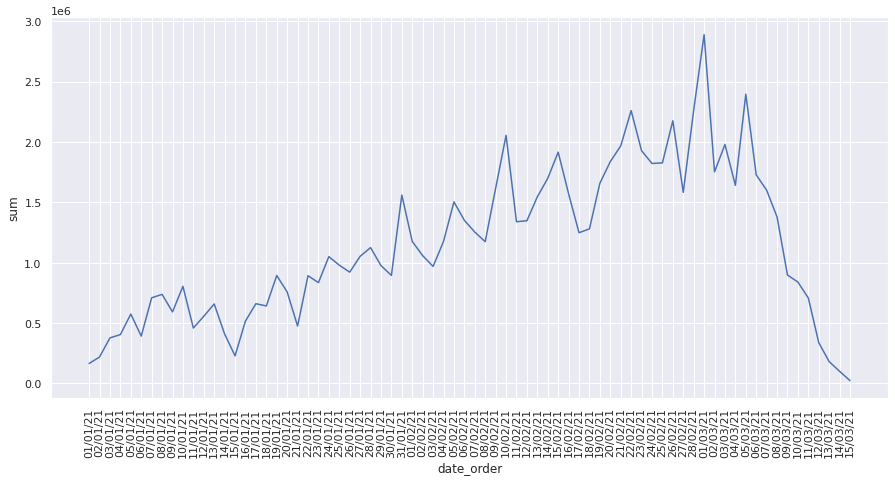

In [58]:
ax = sns.lineplot(data=GMV_Accepted_dy_days, x="date_order", y="sum")
ax.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(12,7)})

In [59]:
# GMV_Accepted по перевозчикам

query_GMV_Accepted_dy_carrier_name = """

SELECT
    A.carrier_name as carrier_name,
    sum(B.sum) as GMV_Accepted
FROM(SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        carrier_name,
        delivery_type,
        number_order,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        date_order <= result_data_order) as A
JOIN
    (SELECT 
        number_order,
        sum(product_price * amount) as sum
    FROM default.product_online
    GROUP BY number_order)as B
ON A.number_order = B.number_order
GROUP BY carrier_name
ORDER BY GMV_Accepted ASC

"""
GMV_Accepted_dy_carrier_name = ph.read_clickhouse(query_GMV_Accepted_dy_carrier_name, connection=connection_default)
GMV_Accepted_dy_carrier_name

,carrier_name,GMV_Accepted
0,3PL 4,3149876.65
1,3PL 3,5816887.71
2,Самодоставка,23777257.11
3,3PL 2,24341944.18
4,3PL 1,27506262.31


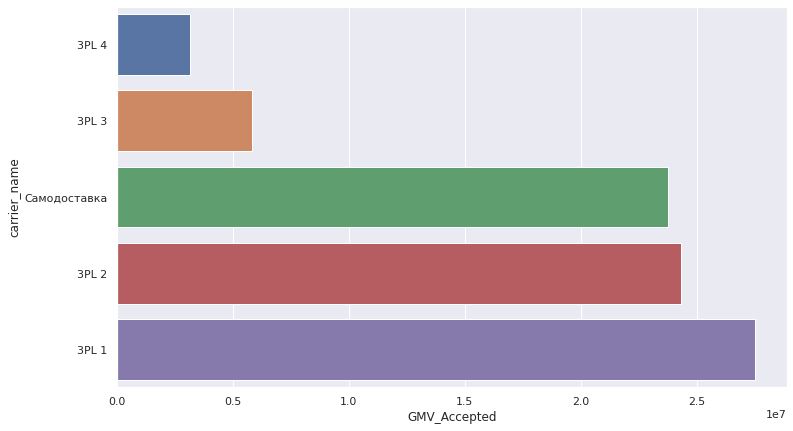

In [60]:
ax = sns.barplot(x="GMV_Accepted", y="carrier_name", data=GMV_Accepted_dy_carrier_name)
sns.set(rc={'figure.figsize':(9,7)})

Большая сумма заказов приходиться на 3PL1

In [61]:
# GMV_Accepted по по типу доставки

query_GMV_Accepted_dy_delivery_type = """

SELECT
    A.delivery_type as delivery_type,
    sum(B.sum) as GMV_Accepted
FROM(SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        carrier_name,
        delivery_type,
        number_order,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        date_order <= result_data_order) as A
JOIN
    (SELECT 
        number_order,
        sum(product_price * amount) as sum
    FROM default.product_online
    GROUP BY number_order)as B
ON A.number_order = B.number_order
GROUP BY delivery_type
ORDER BY GMV_Accepted ASC
"""
GMV_Accepted_dy_delivery_type = ph.read_clickhouse(query_GMV_Accepted_dy_delivery_type, connection=connection_default)
GMV_Accepted_dy_delivery_type

,delivery_type,GMV_Accepted
0,Самовывоз,41122393.83
1,Курьер,43469834.13


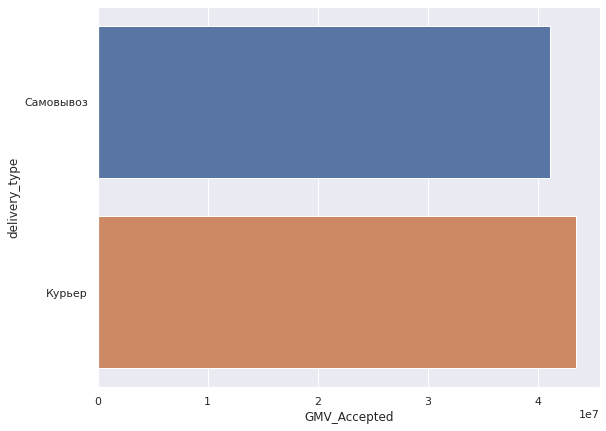

In [62]:
ax = sns.barplot(x="GMV_Accepted", y="delivery_type", data=GMV_Accepted_dy_delivery_type)
sns.set(rc={'figure.figsize':(9,7)})

Сумма заказов больше приходиться на доставку Курьером

In [63]:
# GMV_Accepted по по кластерам склада

query_GMV_Accepted_dy_warehouse_cluster = """

SELECT
    A.warehouse_cluster as warehouse_cluster,
    sum(B.sum) as GMV_Accepted
FROM(SELECT
        toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
        toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
        carrier_name,
        delivery_type,
        number_order,
        warehouse_cluster
    FROM default.logistics_online
    WHERE
        date_order <= result_data_order) as A
JOIN
    (SELECT 
        number_order,
        sum(product_price * amount) as sum
    FROM default.product_online
    GROUP BY number_order)as B
ON A.number_order = B.number_order
GROUP BY warehouse_cluster
ORDER BY GMV_Accepted ASC
"""
GMV_Accepted_dy_warehouse_cluster = ph.read_clickhouse(query_GMV_Accepted_dy_warehouse_cluster, connection=connection_default)
GMV_Accepted_dy_warehouse_cluster

,warehouse_cluster,GMV_Accepted
0,Кластер Хабаровск,116341.51
1,Кластер Калининград,1955305.97
2,Кластер Северо-Запад,2126999.19
3,Кластер Центр,3549144.75
4,Кластер Новосибирск,5120366.08
5,Кластер Санкт-Петербург,7190853.42
6,Кластер Краснодар,7511390.62
7,Кластер Казань,8385456.51
8,Кластер Екатеринбург,9003800.06
9,Кластер Московская область,13394867.44


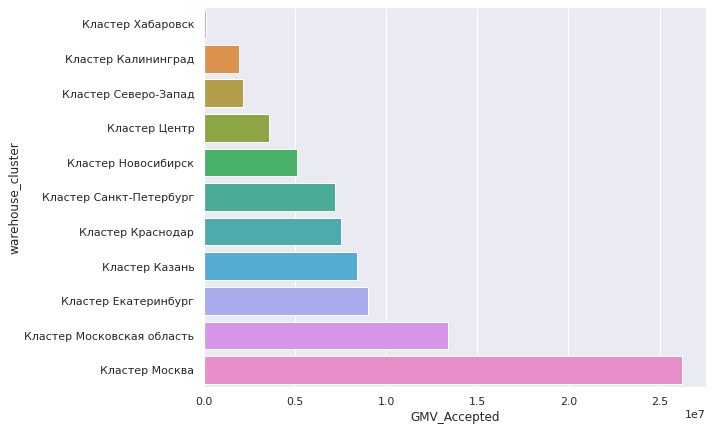

In [64]:
ax = sns.barplot(x="GMV_Accepted", y="warehouse_cluster", data=GMV_Accepted_dy_warehouse_cluster)
sns.set(rc={'figure.figsize':(20,10)})

Сумма продаж со складов в Москве значительно отличаете от всех остальных, что вполне логично, 
так как в Москве расположены самые большие хабы.

**Дашборд к Заданию 4**

http://redash.lab.karpov.courses/public/dashboards/oI3qezH7Me28eSAXmX4NtNkCDAGDYJHqBhvRiml2?org_slug=default


**Выводы к заданию 4**

Сумма продаж со складов в Москве значительно отличаете от всех остальных, что вполне логично, так как в Москве расположены самые большие хабы.
Так же видим что сумма продаж в марте начала сильно проседать, либо в феврале был пик на покупки. Сложно анализировать динамику по датам на таком коротком отрезке времени, необходимо сравнение с этим же периодом в предыдущем году. 


**Задача №5:**
    
Посчитать Return Rate - доля возвратов (отношение количества возвратов к заказам в этот день), в %.

 - Необходимо видеть изменение метрики по дням;

 - Необходимы разрезы по перевозчикам, по кластерам склада и клиента;

In [65]:
# считаем общий Return_Rate

query_Return_Rate = """

SELECT
      (sum(B.amount_return) / sum(A.amount)) * 100 as Return_Rate
FROM (SELECT
        A.date_order as date_order,
        number_order as number_order,
        A.carrier_name as carrier_name,
        A.customer_cluster as customer_cluster,
        A.warehouse_cluster as warehouse_cluster,
        B.amount as amount
      FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            carrier_name,
            customer_cluster,
            number_order,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            date_order <= result_data_order) as A
     JOIN
        (SELECT 
            number_order,
            sum(amount) as amount
        FROM default.product_online
        GROUP BY number_order) as B
     ON A.number_order = B.number_order) as A
LEFT JOIN
    (SELECT
    toDateOrNull(concat(splitByString('-', assumeNotNull(return_date))[1], '-',
                            splitByString('-', assumeNotNull(return_date))[3], '-',
                            splitByString('-', assumeNotNull(return_date))[2])) as return_date,
    number_order,
    sum(amount_return) as amount_return
FROM (SELECT
        toString (return_date) as return_date,
        number_order,
        sum(amount_return) as amount_return
    FROM default.returns_online
    WHERE return_date != '1970-01-01'
    GROUP BY return_date,
             number_order)
 GROUP BY return_date,
             number_order)as B
ON A.number_order = B.number_order

"""
Return_Rate = ph.read_clickhouse(query_Return_Rate, connection=connection_default)
Return_Rate

,Return_Rate
0,1.607404


1,6 % возврата, просто так по себе он мало о чем говорит, необходимо сравнивать в динамике

In [66]:
# Return_Rate по дням

query_Return_Rate_by_days = """

SELECT  date_order,
        sum(B.amount_return) as amount_return,
        sum(A.amount) as amount,
        (sum(B.amount_return) / sum(A.amount)) * 100 as Return_Rate
FROM (SELECT
        A.date_order as date_order,
        A.number_order as number_order,
        A.carrier_name as carrier_name,
        A.customer_cluster as customer_cluster,
        A.warehouse_cluster as warehouse_cluster,
        B.amount as amount
      FROM (SELECT
            toDateOrNull(date_order) as date_order,                    -- переводим данные в формат даты
            carrier_name,
            customer_cluster,
            number_order,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            date_order != '1970-01-01' and date_order IS NOT NULL) as A
     JOIN
        (SELECT 
            number_order,
            sum(amount) as amount
        FROM default.product_online
        GROUP BY number_order) as B
     ON A.number_order = B.number_order) as A
LEFT JOIN
    (SELECT 
        return_date,
        number_order,
        sum(amount_return) as amount_return
    FROM default.returns_online
    WHERE return_date != '1970-01-01'
    GROUP BY return_date,
             number_order)as B
ON A.number_order = B.number_order
GROUP BY date_order
ORDER BY date_order ASC

"""
Return_Rate_by_days = pd.read_csv('Return_Rate_by_days.csv')
Return_Rate_by_days

,date_order,amount_return,amount,Return_Rate
0,01/01/21,0,29,0.000000
1,02/01/21,1,53,1.886792
2,03/01/21,1,72,1.388889
3,04/01/21,0,85,0.000000
4,05/01/21,0,104,0.000000
...,...,...,...,...
69,11/03/21,0,128,0.000000
70,12/03/21,0,61,0.000000
71,13/03/21,0,35,0.000000
72,14/03/21,0,17,0.000000


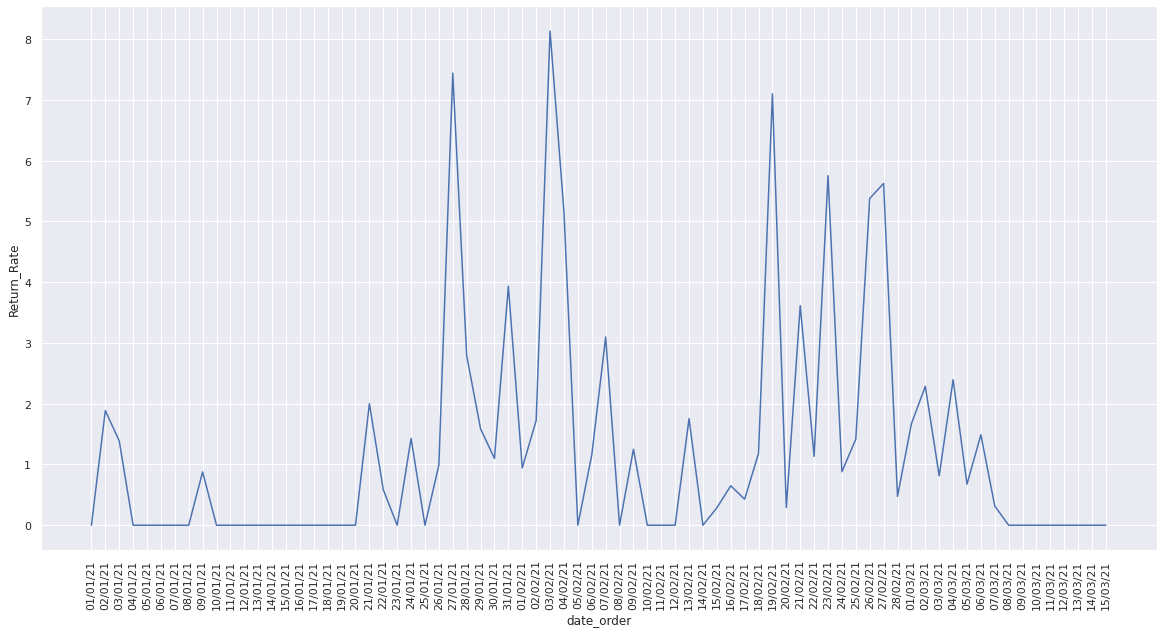

In [67]:
ax = sns.lineplot(data=Return_Rate_by_days, x="date_order", y="Return_Rate")
ax.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(9,7)})

In [68]:
# считаем Return_Rate по перевозчикам

query_Return_Rate_by_carrier = """

SELECT
      carrier_name,
      (sum(B.amount_return) / sum(A.amount)) * 100 as Return_Rate
FROM (SELECT
        A.date_order as date_order,
        number_order as number_order,
        A.carrier_name as carrier_name,
        A.customer_cluster as customer_cluster,
        A.warehouse_cluster as warehouse_cluster,
        B.amount as amount
      FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            carrier_name,
            customer_cluster,
            number_order,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            date_order <= result_data_order) as A
     JOIN
        (SELECT 
            number_order,
            sum(amount) as amount
        FROM default.product_online
        GROUP BY number_order) as B
     ON A.number_order = B.number_order) as A
LEFT JOIN
    (SELECT
    toDateOrNull(concat(splitByString('-', assumeNotNull(return_date))[1], '-',
                            splitByString('-', assumeNotNull(return_date))[3], '-',
                            splitByString('-', assumeNotNull(return_date))[2])) as return_date,
    number_order,
    sum(amount_return) as amount_return
FROM (SELECT
        toString (return_date) as return_date,
        number_order,
        sum(amount_return) as amount_return
    FROM default.returns_online
    WHERE return_date != '1970-01-01'
    GROUP BY return_date,
             number_order)
 GROUP BY return_date,
             number_order)as B
ON A.number_order = B.number_order
GROUP BY carrier_name
ORDER BY Return_Rate DESC

"""
Return_Rate_by_carrier = ph.read_clickhouse(query_Return_Rate_by_carrier, connection=connection_default)
Return_Rate_by_carrier

,carrier_name,Return_Rate
0,3PL 4,6.984668
1,3PL 3,1.815039
2,3PL 2,1.719438
3,3PL 1,1.416061
4,Самодоставка,0.968310


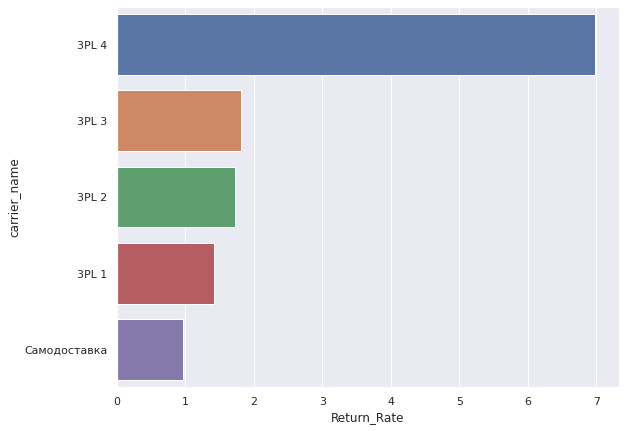

In [69]:
ax = sns.barplot(x="Return_Rate", y="carrier_name", data=Return_Rate_by_carrier)
sns.set(rc={'figure.figsize':(9,7)})

Самый большой процент возврата у перевозчика 3 PL 4 это может быть совпадение, а может быть не качественная транспортировка, необходимо изучать причины возвратов.

In [70]:
# считаем Return_Rate по кластерам склада

query_Return_Rate_by_warehouse = """

SELECT
      warehouse_cluster,
      (sum(B.amount_return) / sum(A.amount)) * 100 as Return_Rate
FROM (SELECT
        A.date_order as date_order,
        number_order as number_order,
        A.carrier_name as carrier_name,
        A.customer_cluster as customer_cluster,
        A.warehouse_cluster as warehouse_cluster,
        B.amount as amount
      FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            carrier_name,
            customer_cluster,
            number_order,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            date_order <= result_data_order) as A
     JOIN
        (SELECT 
            number_order,
            sum(amount) as amount
        FROM default.product_online
        GROUP BY number_order) as B
     ON A.number_order = B.number_order) as A
LEFT JOIN
    (SELECT
    toDateOrNull(concat(splitByString('-', assumeNotNull(return_date))[1], '-',
                            splitByString('-', assumeNotNull(return_date))[3], '-',
                            splitByString('-', assumeNotNull(return_date))[2])) as return_date,
    number_order,
    sum(amount_return) as amount_return
FROM (SELECT
        toString (return_date) as return_date,
        number_order,
        sum(amount_return) as amount_return
    FROM default.returns_online
    WHERE return_date != '1970-01-01'
    GROUP BY return_date,
             number_order)
 GROUP BY return_date,
             number_order)as B
ON A.number_order = B.number_order
GROUP BY warehouse_cluster
ORDER BY Return_Rate DESC

"""
Return_Rate_by_warehouse = ph.read_clickhouse(query_Return_Rate_by_warehouse, connection=connection_default)
Return_Rate_by_warehouse

,warehouse_cluster,Return_Rate
0,Кластер Хабаровск,4.545455
1,Кластер Северо-Запад,2.380952
2,Кластер Казань,2.048193
3,Кластер Краснодар,1.857996
4,Кластер Москва,1.784298
5,Кластер Московская область,1.681957
6,Кластер Санкт-Петербург,1.516245
7,Кластер Калининград,1.333333
8,Кластер Новосибирск,1.279528
9,Кластер Екатеринбург,0.820633


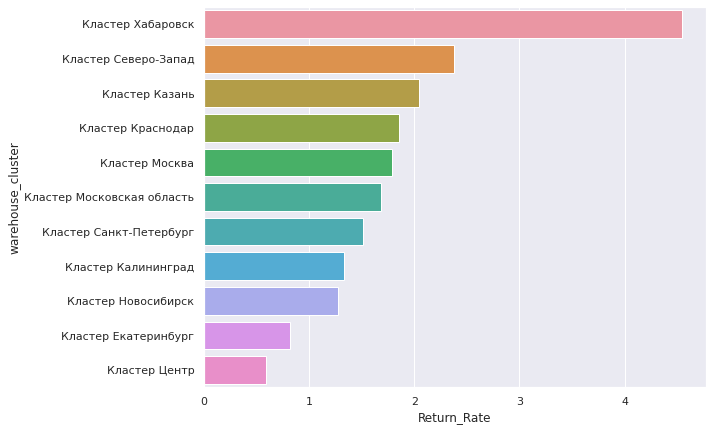

In [71]:
ax = sns.barplot(x="Return_Rate", y="warehouse_cluster", data=Return_Rate_by_warehouse)
sns.set(rc={'figure.figsize':(9,7)})

Тут такая же ситуация, необходимо изучать причины возвратов

In [72]:
# считаем Return_Rate по кластерам клиента

query_Return_Rate_by_customer = """

SELECT
      customer_cluster,
      (sum(B.amount_return) / sum(A.amount)) * 100 as Return_Rate
FROM (SELECT
        A.date_order as date_order,
        number_order as number_order,
        A.carrier_name as carrier_name,
        A.customer_cluster as customer_cluster,
        A.warehouse_cluster as warehouse_cluster,
        B.amount as amount
      FROM (SELECT
            toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
            toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
            carrier_name,
            customer_cluster,
            number_order,
            warehouse_cluster
        FROM default.logistics_online
        WHERE
            date_order <= result_data_order) as A
     JOIN
        (SELECT 
            number_order,
            sum(amount) as amount
        FROM default.product_online
        GROUP BY number_order) as B
     ON A.number_order = B.number_order) as A
LEFT JOIN
    (SELECT
    toDateOrNull(concat(splitByString('-', assumeNotNull(return_date))[1], '-',
                            splitByString('-', assumeNotNull(return_date))[3], '-',
                            splitByString('-', assumeNotNull(return_date))[2])) as return_date,
    number_order,
    sum(amount_return) as amount_return
FROM (SELECT
        toString (return_date) as return_date,
        number_order,
        sum(amount_return) as amount_return
    FROM default.returns_online
    WHERE return_date != '1970-01-01'
    GROUP BY return_date,
             number_order)
 GROUP BY return_date,
             number_order)as B
ON A.number_order = B.number_order
GROUP BY customer_cluster
ORDER BY Return_Rate DESC

"""
Return_Rate_by_customer = ph.read_clickhouse(query_Return_Rate_by_customer, connection=connection_default)
Return_Rate_by_customer

,customer_cluster,Return_Rate
0,Кластер Калининград,5.263158
1,Кластер Казань,2.431611
2,Кластер Центр,2.402135
3,Кластер Санкт-Петербург,2.188329
4,Кластер Московская область,2.026736
5,Кластер Краснодар,1.611047
6,Кластер Москва,1.341032
7,Кластер Новосибирск,1.063830
8,Кластер Екатеринбург,0.709607
9,Кластер Северо-Запад,0.235849


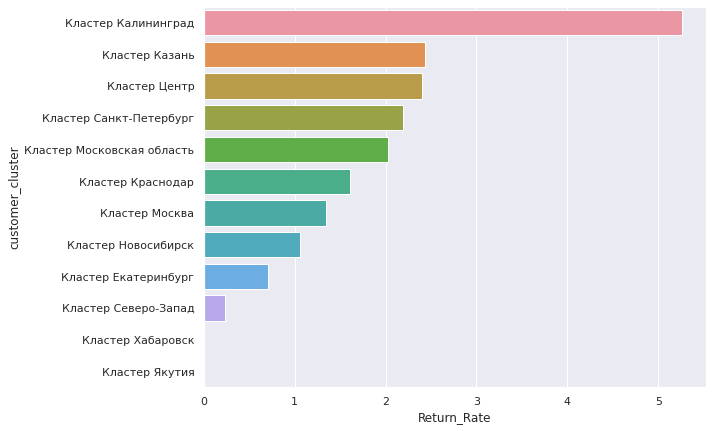

In [73]:
ax = sns.barplot(x="Return_Rate", y="customer_cluster", data=Return_Rate_by_customer)
sns.set(rc={'figure.figsize':(9,7)})

В кластере покупателей в лидерах Калининград

**Дашборд для Задания 5**

http://redash.lab.karpov.courses/public/dashboards/8yrZUz0SQvskoZOerlcg0S2E9hd4fajG9LY8425L?org_slug=default

**Выводы по заданию № 5**

Средний процент возвратов за период составил 1,6%.  Изучив данные детально видим, что процент возврата на склад в Хабаровске сильно отличается и достаточно высокий, видимо на складе что-то происходит с товаром и его хранением, может быть, кончено и чистое совпадение, что покупателю просто не подходит товар. Необходимо изучить данные возвраты. 
Еще видим, что покупатели в Калининграде так же чаще чем остальные возвращают товар, так же необходимо более детально изучить причины возвратов. 
У доставщика  3PL 4 так же очень высокий процент возврата, есть вероятность, что доставка осуществляется не качественно. 



**Задача №6:**

   Посчитать GMV D-R - метрика, отражающая совокупный объем доставленных заказов за вычетом возвратов, в рублях.

 - Необходимо видеть изменение метрики по дням (для всех дней, которые были раньше, чем дата расчета метрики);

 - Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада.

In [74]:
# сначала соеденим таблицы по возвратам и продажам, и посмотрим противоречия в возвратах, 
# есть ли такие строки где возвратов больше чем покупок

query_Return = """

SELECT 
    A.number_order as number_order,
    A.product_ID as product_ID,
    A.product_price as product_price,
    A.amount as amount,
    B.amount_return as amount_return
FROM (SELECT *
      FROM default.product_online) as A
LEFT JOIN
    (SELECT 
        number_order,
        product_ID,
        count(amount_return) as amount_return
    FROM default.returns_online
    WHERE return_date != '1970-01-01'
    GROUP BY
        number_order,
        product_ID) as B
ON A.number_order = B.number_order and
   A.product_ID = B.product_ID
WHERE amount_return > amount

"""
Return = ph.read_clickhouse(query_Return, connection=connection_default)
Return

,number_order,product_ID,product_price,amount,amount_return
0,3312071441,983585403,5065.24,1,2
1,3544314143,983580910,8066.34,1,2
2,3544314143,983582998,7649.64,1,2
3,3514701411,983582698,5631.43,1,2
4,347231620,983584784,8353.89,1,2
5,347231620,983581161,5327.94,1,2
6,350534160,983580175,2814.44,1,2
7,349492909,983584267,7372.56,1,2
8,3516640414,983589331,3245.04,1,2
9,3516640414,983582976,6788.36,1,2


Да, оказалось, что есть такие. При невозможности проверить данные,
есть два варианта убрать эти данные или скорректировать на кол-во покупок.
Мне кажется, второй вариант будет правильней.

In [75]:
# Посмотрим общую сумму GMV_D_R

query_GMV_D_R = """

SELECT sum(sum_ret) as sum__return,
      sum(sum) as sum_sales,
      sum_sales -sum__return  as GMV_D_R
FROM(SELECT *
    FROM(SELECT DISTINCT number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
        FROM (SELECT
                number_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
                order_status,
                toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
                number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
                FROM default.logistics_online
                WHERE order_status = 'Доставлен' and
                      date_order IS not NULL and   
                      result_data_order IS not NULL and                                                
                      planned_data_order IS not NULL and
                      date_order <= result_data_order)) as A
    JOIN (SELECT number_order,
                sum(product_price * amount)as sum
          FROM default.product_online
          GROUP BY number_order) as B
    ON A.number_order = B.number_order) as C
LEFT JOIN (SELECT SUM (amount_return * product_price) as sum_ret,
                 number_order
        FROM(SELECT CASE WHEN amount >= amount_return THEN amount_return ELSE amount END as amount_return,
                amount,
                number_order,
                product_ID,
                product_price
            FROM (SELECT number_order,
                        product_ID,
                        sum(amount_return) as amount_return
                FROM default.returns_online
                WHERE return_date != '1970-01-01'
                GROUP BY return_date,
                         number_order,
                         product_ID) as A
            JOIN (SELECT number_order,
                        product_ID,
                        amount,
                        product_price
                 FROM default.product_online) as B
            ON A.number_order = B.number_order and
               A.product_ID = B.product_ID)
            GROUP BY number_order
            ORDER BY number_order) as D
ON C.number_order = D.number_order

"""
GMV_D_R = ph.read_clickhouse(query_GMV_D_R, connection=connection_default)
GMV_D_R

,sum__return,sum_sales,GMV_D_R
0,1235874.79,84390771.15,83154896.36


In [76]:
# Посмотрим сумму GMV_D_R по дням

query_GMV_D_R_by_day = """

SELECT date,
        sum(sum_sales) sum_sales,
        sum(sum_ret) as sum__return,
        sum_sales -sum__return  as GMV_D_R
FROM(SELECT sum(sum) as sum_sales,
       date 
    FROM(SELECT DISTINCT number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster,
                date_order as date
        FROM (SELECT
                number_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
                order_status,
                toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
                number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
                FROM default.logistics_online
                WHERE order_status = 'Доставлен' and
                      date_order IS not NULL and   
                      result_data_order IS not NULL and                                                
                      planned_data_order IS not NULL and
                      date_order <= result_data_order)) as A
    JOIN (SELECT number_order,
                sum(product_price * amount)as sum
          FROM default.product_online
          GROUP BY number_order) as B
    ON A.number_order = B.number_order
GROUP BY date) as C
LEFT JOIN (SELECT SUM (amount_return * product_price) as sum_ret,
                 date
        FROM(SELECT CASE WHEN amount >= amount_return THEN amount_return ELSE amount END as amount_return,
                amount,
                number_order,
                product_ID,
                product_price,
                date
            FROM (SELECT toDateOrNull(concat(splitByString('-', assumeNotNull(toString(return_date)))[1], '-',
                            splitByString('-', assumeNotNull(toString(return_date)))[3], '-',
                            splitByString('-', assumeNotNull(toString(return_date)))[2])) as date,
                        number_order,
                        product_ID,
                        sum(amount_return) as amount_return
                FROM default.returns_online
                WHERE return_date != '1970-01-01'
                GROUP BY return_date,
                         number_order,
                         product_ID) as A
            JOIN (SELECT number_order,
                        product_ID,
                        amount,
                        product_price
                 FROM default.product_online) as B
            ON A.number_order = B.number_order and
               A.product_ID = B.product_ID)
            GROUP BY date
            ORDER BY date) as D
ON C.date = D.date
GROUP BY date
ORDER BY date

"""
GMV_D_R_by_day = pd.read_csv('GMV_D_R_by_day.csv')
GMV_D_R_by_day

,date,sum_sales,sum__return,GMV_D_R
0,01/01/21,165253.86,0.00,165253.86
1,02/01/21,219164.61,0.00,219164.61
2,03/01/21,377629.99,0.00,377629.99
3,04/01/21,404870.30,0.00,404870.30
4,05/01/21,574879.34,0.00,574879.34
...,...,...,...,...
69,11/03/21,707427.05,90348.19,617078.86
70,12/03/21,337853.65,55789.57,282064.08
71,13/03/21,180889.43,0.00,180889.43
72,14/03/21,100518.09,0.00,100518.09


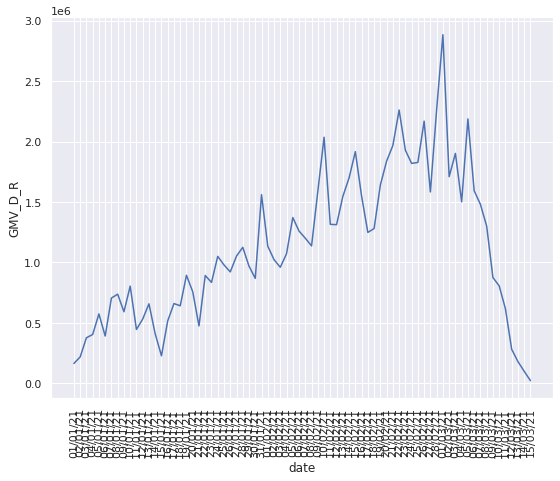

In [77]:
ax = sns.lineplot(data=GMV_D_R_by_day, x="date", y="GMV_D_R")
ax.tick_params(axis='x', rotation=90)
sns.set(rc={'figure.figsize':(9,7)})

In [78]:
# Посмотрим сумму GMV_D_R по перевозчикам

query_GMV_D_R_carrier_name = """

SELECT sum(sum_ret) as sum__return,
      sum(sum) as sum_sales,
      sum_sales -sum__return  as GMV_D_R,
      carrier_name
FROM(SELECT *
    FROM(SELECT DISTINCT number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
        FROM (SELECT
                number_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
                order_status,
                toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
                number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
                FROM default.logistics_online
                WHERE order_status = 'Доставлен' and
                      date_order IS not NULL and   
                      result_data_order IS not NULL and                                                
                      planned_data_order IS not NULL and
                      date_order <= result_data_order)) as A
    JOIN (SELECT number_order,
                sum(product_price * amount)as sum
          FROM default.product_online
          GROUP BY number_order) as B
    ON A.number_order = B.number_order) as C
LEFT JOIN (SELECT SUM (amount_return * product_price) as sum_ret,
                 number_order
        FROM(SELECT CASE WHEN amount >= amount_return THEN amount_return ELSE amount END as amount_return,
                amount,
                number_order,
                product_ID,
                product_price
            FROM (SELECT number_order,
                        product_ID,
                        sum(amount_return) as amount_return
                FROM default.returns_online
                WHERE return_date != '1970-01-01'
                GROUP BY return_date,
                         number_order,
                         product_ID) as A
            JOIN (SELECT number_order,
                        product_ID,
                        amount,
                        product_price
                 FROM default.product_online) as B
            ON A.number_order = B.number_order and
               A.product_ID = B.product_ID)
            GROUP BY number_order
            ORDER BY number_order) as D
ON C.number_order = D.number_order
GROUP BY carrier_name
ORDER BY GMV_D_R ASC

"""
GMV_D_R_carrier_name = ph.read_clickhouse(query_GMV_D_R_carrier_name, connection=connection_default)
GMV_D_R_carrier_name

,sum__return,sum_sales,GMV_D_R,carrier_name
0,204785.94,3149876.65,2945090.71,3PL 4
1,61465.32,5756495.88,5695030.56,3PL 3
2,204398.48,23702430.99,23498032.51,Самодоставка
3,443842.48,24334046.98,23890204.50,3PL 2
4,321382.57,27447920.65,27126538.08,3PL 1


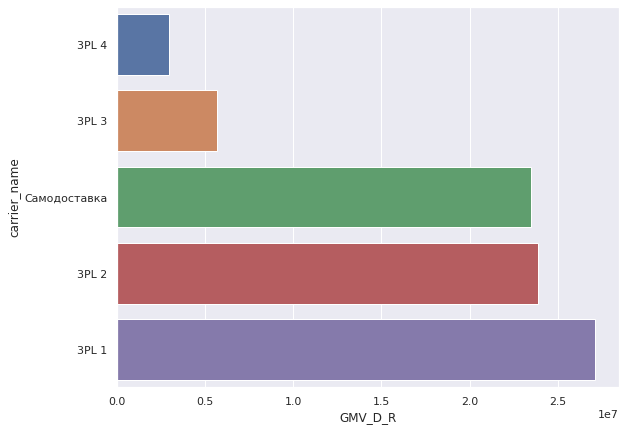

In [79]:
ax = sns.barplot(x="GMV_D_R", y="carrier_name", data=GMV_D_R_carrier_name)
sns.set(rc={'figure.figsize':(9,7)})

In [80]:
# Посмотрим сумму GMV_D_R по типу доставки

query_GMV_D_R_delivery_type = """

SELECT sum(sum_ret) as sum__return,
      sum(sum) as sum_sales,
      sum_sales -sum__return  as GMV_D_R,
      delivery_type
FROM(SELECT *
    FROM(SELECT DISTINCT number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
        FROM (SELECT
                number_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
                order_status,
                toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
                number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
                FROM default.logistics_online
                WHERE order_status = 'Доставлен' and
                      date_order IS not NULL and   
                      result_data_order IS not NULL and                                                
                      planned_data_order IS not NULL and
                      date_order <= result_data_order)) as A
    JOIN (SELECT number_order,
                sum(product_price * amount)as sum
          FROM default.product_online
          GROUP BY number_order) as B
    ON A.number_order = B.number_order) as C
LEFT JOIN (SELECT SUM (amount_return * product_price) as sum_ret,
                 number_order
        FROM(SELECT CASE WHEN amount >= amount_return THEN amount_return ELSE amount END as amount_return,
                amount,
                number_order,
                product_ID,
                product_price
            FROM (SELECT number_order,
                        product_ID,
                        sum(amount_return) as amount_return
                FROM default.returns_online
                WHERE return_date != '1970-01-01'
                GROUP BY return_date,
                         number_order,
                         product_ID) as A
            JOIN (SELECT number_order,
                        product_ID,
                        amount,
                        product_price
                 FROM default.product_online) as B
            ON A.number_order = B.number_order and
               A.product_ID = B.product_ID)
            GROUP BY number_order
            ORDER BY number_order) as D
ON C.number_order = D.number_order
GROUP BY delivery_type
ORDER BY GMV_D_R ASC

"""
GMV_D_R_delivery_type = ph.read_clickhouse(query_GMV_D_R_delivery_type, connection=connection_default)
GMV_D_R_delivery_type

,sum__return,sum_sales,GMV_D_R,delivery_type
0,670832.86,41066313.23,40395480.37,Самовывоз
1,565041.93,43324457.92,42759415.99,Курьер


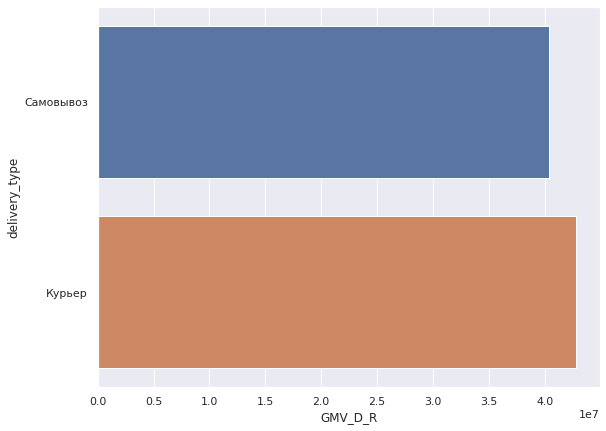

In [81]:
ax = sns.barplot(x="GMV_D_R", y="delivery_type", data=GMV_D_R_delivery_type)
sns.set(rc={'figure.figsize':(9,7)})

In [82]:
# Посмотрим сумму GMV_D_R по кластеру склада

query_GMV_D_R_warehouse_cluster = """

SELECT sum(sum_ret) as sum__return,
      sum(sum) as sum_sales,
      sum_sales -sum__return  as GMV_D_R,
      warehouse_cluster
FROM(SELECT *
    FROM(SELECT DISTINCT number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
        FROM (SELECT
                number_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(date_order))[1], '-',
                            splitByString('-', assumeNotNull(date_order))[3], '-',
                            splitByString('-', assumeNotNull(date_order))[2])) as date_order,
                order_status,
                toDateOrNull(concat(splitByString('-', assumeNotNull(planned_data_order))[1], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[3], '-',
                            splitByString('-', assumeNotNull(planned_data_order))[2])) as planned_data_order,
                toDateOrNull(concat(splitByString('-', assumeNotNull(result_data_order))[1], '-',
                            splitByString('-', assumeNotNull(result_data_order))[3], '-',
                            splitByString('-', assumeNotNull(result_data_order))[2])) as result_data_order,
                number_order,
                carrier_name,
                delivery_type,
                warehouse_cluster
                FROM default.logistics_online
                WHERE order_status = 'Доставлен' and
                      date_order IS not NULL and   
                      result_data_order IS not NULL and                                                
                      planned_data_order IS not NULL and
                      date_order <= result_data_order)) as A
    JOIN (SELECT number_order,
                sum(product_price * amount)as sum
          FROM default.product_online
          GROUP BY number_order) as B
    ON A.number_order = B.number_order) as C
LEFT JOIN (SELECT SUM (amount_return * product_price) as sum_ret,
                 number_order
        FROM(SELECT CASE WHEN amount >= amount_return THEN amount_return ELSE amount END as amount_return,
                amount,
                number_order,
                product_ID,
                product_price
            FROM (SELECT number_order,
                        product_ID,
                        sum(amount_return) as amount_return
                FROM default.returns_online
                WHERE return_date != '1970-01-01'
                GROUP BY return_date,
                         number_order,
                         product_ID) as A
            JOIN (SELECT number_order,
                        product_ID,
                        amount,
                        product_price
                 FROM default.product_online) as B
            ON A.number_order = B.number_order and
               A.product_ID = B.product_ID)
            GROUP BY number_order
            ORDER BY number_order) as D
ON C.number_order = D.number_order
GROUP BY warehouse_cluster
ORDER BY GMV_D_R ASC

"""
GMV_D_R_warehouse_cluster = ph.read_clickhouse(query_GMV_D_R_warehouse_cluster, connection=connection_default)
GMV_D_R_warehouse_cluster

,sum__return,sum_sales,GMV_D_R,warehouse_cluster
0,6870.56,116341.51,109470.95,Кластер Хабаровск
1,31201.22,1955305.97,1924104.75,Кластер Калининград
2,45504.91,2126999.19,2081494.28,Кластер Северо-Запад
3,14070.34,3549144.75,3535074.41,Кластер Центр
4,60313.94,5120366.08,5060052.14,Кластер Новосибирск
5,128373.72,7172779.41,7044405.69,Кластер Санкт-Петербург
6,149521.67,7503493.42,7353971.75,Кластер Краснодар
7,151669.03,8362930.26,8211261.23,Кластер Казань
8,83873.45,8986058.66,8902185.21,Кластер Екатеринбург
9,206356.55,13334475.61,13128119.06,Кластер Московская область


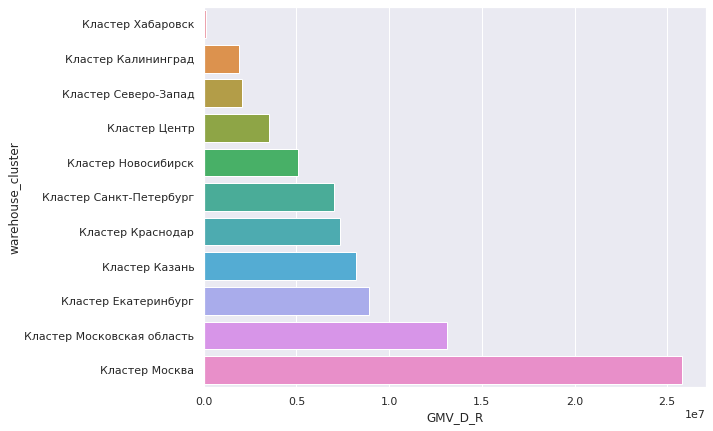

In [83]:
ax = sns.barplot(x="GMV_D_R", y="warehouse_cluster", data=GMV_D_R_warehouse_cluster)
sns.set(rc={'figure.figsize':(9,7)})

GMV_D_R не сильно отличается от GMV Accepted, те же лидеры по сумме заказаов.

По кластеру склада - Москва, по типу доставки - курьер, по перевозчику - самодоставка, значит процент возврата мало повлиял на метрику

**Дашбор для 6 Задания**

http://redash.lab.karpov.courses/public/dashboards/s8JLLOrsufweKvY4bAOSNsnG19rwgRGKaIlRAStP?org_slug=default

**Выводы по заданию 6**

Ту так же видим, что сумма продаж с учетом возвратов  со складов в Москве значительно отличаете от всех остальных, что вполне логично, так как в Москве расположены самые большие хабы.
И опять видим что сумма продаж с учетом возвратов в марте начала сильно проседать, либо в феврале был пик на покупки. Сложно анализировать динамику по датам на таком коротком отрезке времени, необходимо сравнение с этим же периодом в предыдущем году.
